In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgbm


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('dfdaily.csv')[['Datetime','PJMW_MW']]

In [3]:
 df1=df.set_index('Datetime')

<AxesSubplot:xlabel='Datetime'>

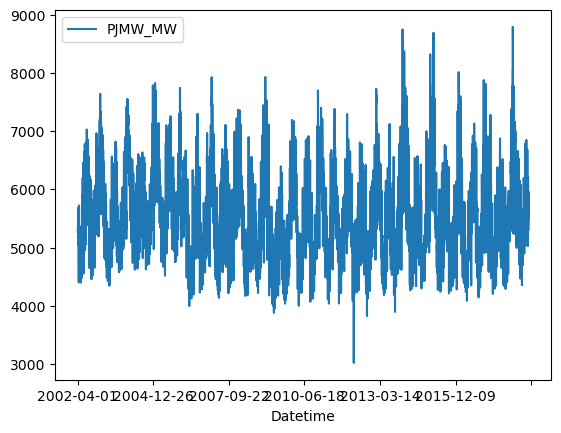

In [4]:
df1.plot()

## Data Preprocessing

In [5]:
df1 = np.array(df1).reshape(-1,1)
df1

array([[5271.17391304],
       [5310.41666667],
       [5325.91666667],
       ...,
       [5959.70833333],
       [5805.04166667],
       [5489.        ]])

## Taking 7 days as input and the next day i.e. 8th is output

In [6]:
def create_database(database,time_step =1):
    dataX,dataY =[],[]
    for i in range(len(database)-time_step):
        a= database[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(database[i+time_step,0])
    return np.array(dataX),np.array(dataY)

## Train -Test Split

In [7]:
##splitting dataset into train and test split

training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [8]:
training_size,test_size

(4178, 1791)

In [9]:
time_step=7
X_train,y_train=create_database(train_data,time_step)
X_test,y_test =create_database(test_data,time_step)

In [10]:
print(X_train.shape), print(y_train.shape)

(4171, 7)
(4171,)


(None, None)

In [11]:
print(X_test.shape), print(y_test.shape)

(1784, 7)
(1784,)


(None, None)

In [12]:
X_train[0],y_train[0]

(array([5271.17391304, 5310.41666667, 5325.91666667, 5670.79166667,
        5686.125     , 5367.79166667, 5052.47916667]),
 5283.875)

In [13]:
X_train[1],y_train[1]

(array([5310.41666667, 5325.91666667, 5670.79166667, 5686.125     ,
        5367.79166667, 5052.47916667, 5283.875     ]),
 5136.083333333333)

## Model building

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lin_model=LinearRegression()
rn_model=RandomForestRegressor(n_estimators=100, random_state=1)
dt_model=DecisionTreeRegressor()
xgboost_model = xgb.XGBRegressor()
lgbm_model = lgbm.LGBMRegressor()

## Model Training

In [16]:
lin_model.fit(X_train,y_train)
rn_model.fit(X_train,y_train)
dt_model.fit(X_train,y_train)
xgboost_model.fit(X_train,y_train)
lgbm_model.fit(X_train,y_train)

LGBMRegressor()

## Model Testing

In [17]:
## LINEAR MODEL
lin_pred = lin_model.predict(X_test)

## RANDOM FOREST MODEL 
rn_pred=rn_model.predict(X_test)


## Decison TRee MODEL 
DT_pred=dt_model.predict(X_test)


## XGBOOST MODEL
Xg_pred =xgboost_model.predict(X_test)

## LGBM MODEL
lgbm_pred = lgbm_model.predict(X_test)

## plot b/w Test Data and prediction

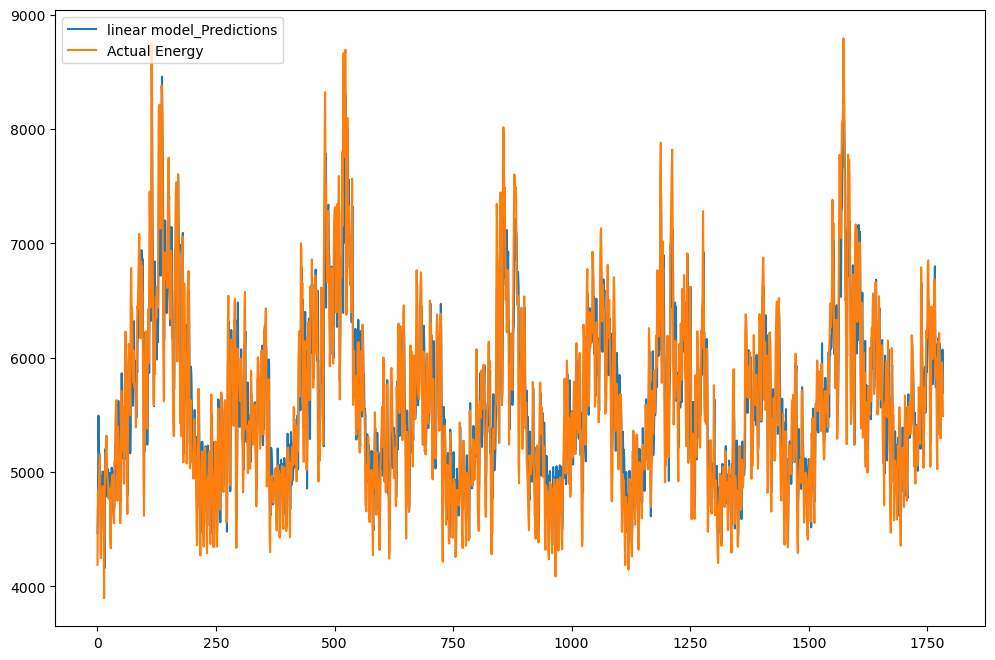

In [18]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(lin_pred,label='linear model_Predictions')
plt.plot(y_test,label='Actual Energy')
plt.legend(loc="upper left")

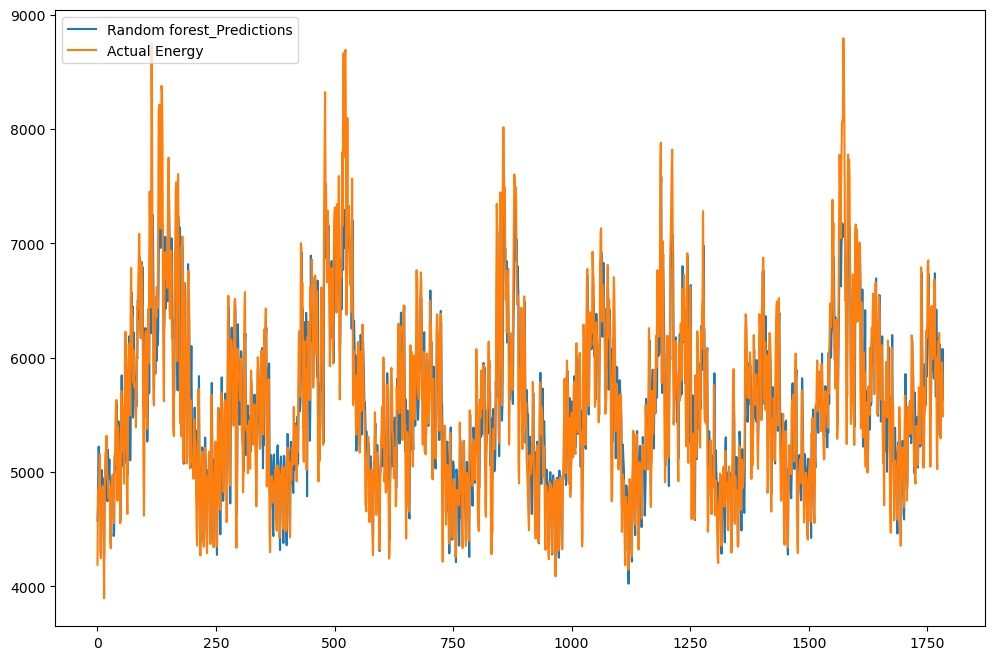

In [19]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(rn_pred,label='Random forest_Predictions')
plt.plot(y_test,label='Actual Energy')
plt.legend(loc="upper left")

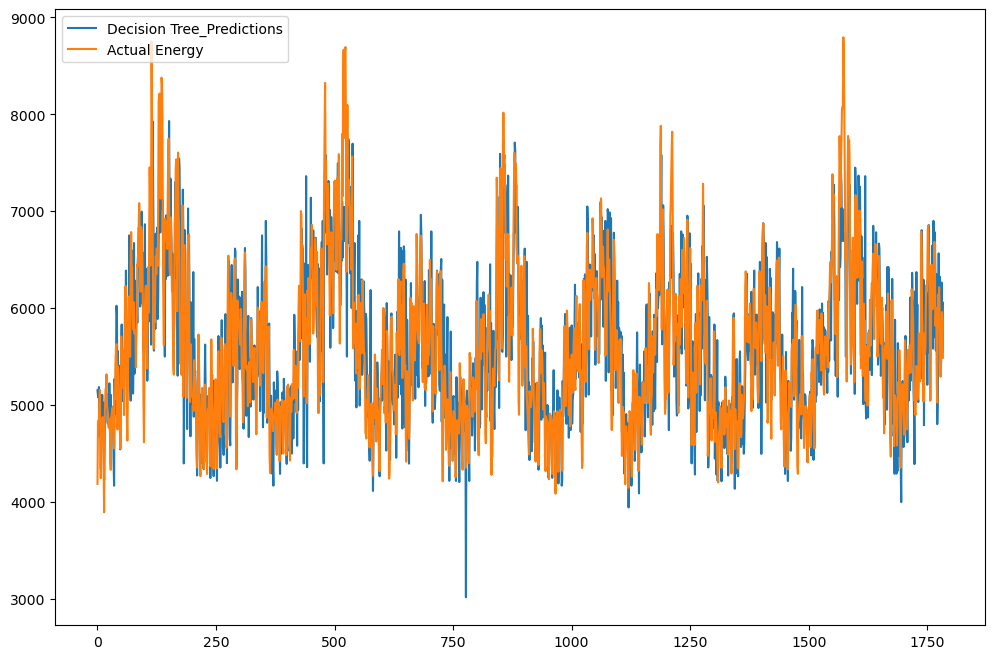

In [20]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(DT_pred,label='Decision Tree_Predictions')
plt.plot(y_test,label='Actual Energy')
plt.legend(loc="upper left")


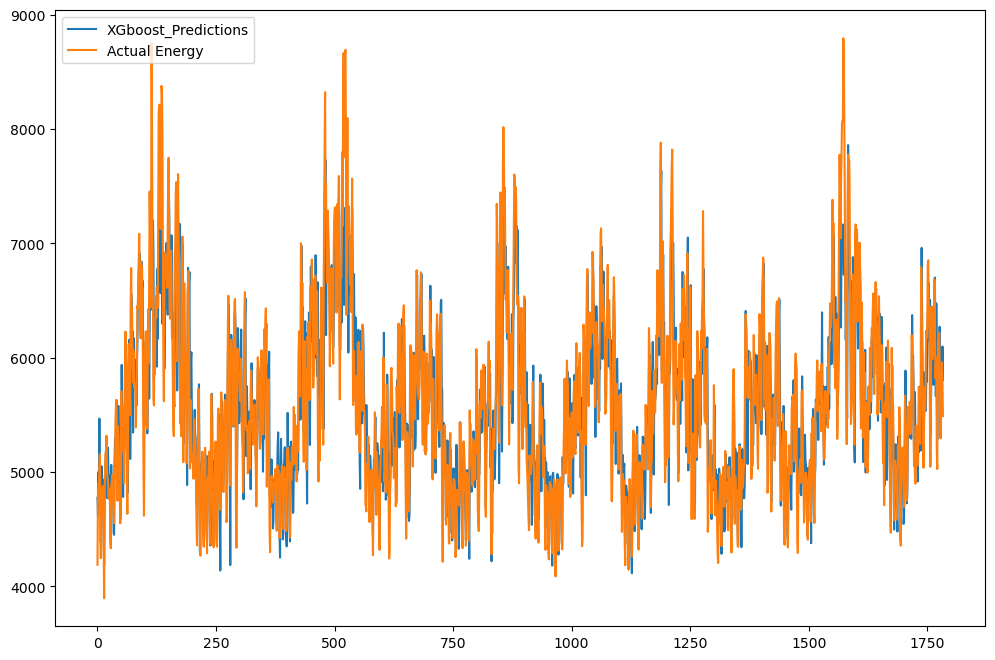

In [21]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(Xg_pred,label='XGboost_Predictions')
plt.plot(y_test,label='Actual Energy')
plt.legend(loc="upper left")

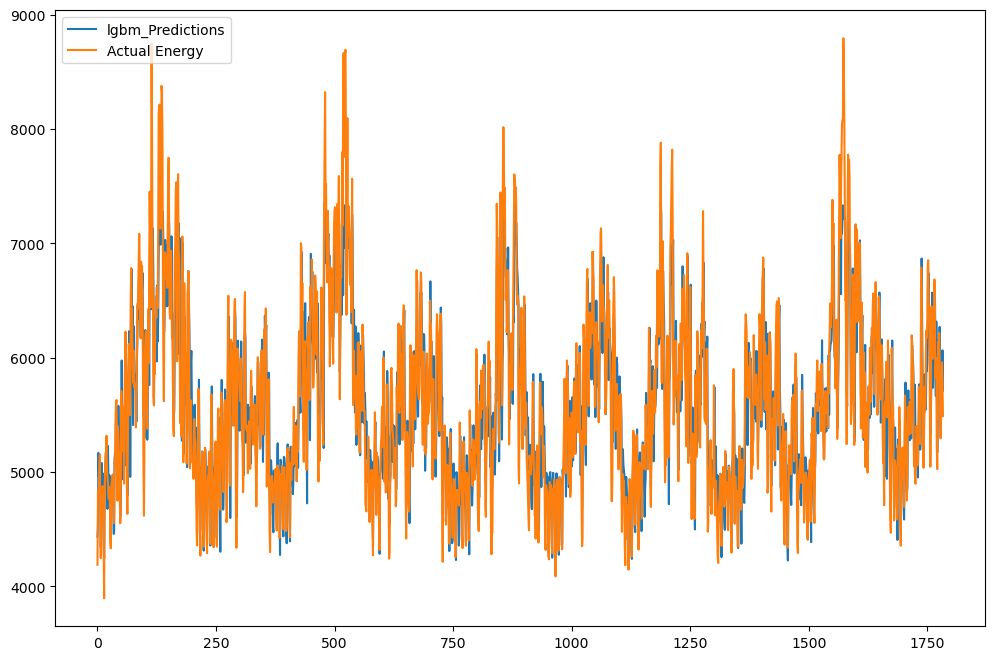

In [22]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(lgbm_pred,label='lgbm_Predictions')
plt.plot(y_test,label='Actual Energy')
plt.legend(loc="upper left")

## Calculating MSE, RMSE, MAPE values

In [23]:
lin_rmse_error = round(rmse(y_test,lin_pred ),4)
lin_mse_error =(lin_rmse_error**2).round(4)
lin_mape=round((mean_absolute_percentage_error(y_test,lin_pred)*100),3)

print(f'MSE linear model Error: {lin_mse_error}\nRMSE  linear model Error: {lin_rmse_error}\nMAPE linear model: {lin_mape}')

MSE linear model Error: 133075.8298
RMSE  linear model Error: 364.7956
MAPE linear model: 4.908


In [24]:
RN_rmse_error = round(rmse(y_test,rn_pred ),4)
RN_mse_error =(RN_rmse_error**2).round(4)
RN_mape=round((mean_absolute_percentage_error(y_test,rn_pred)*100),3)

print(f'MSE Random Forest Error: {RN_mse_error}\nRMSE  random forest Error: {RN_rmse_error}\nMAPE Random Forest: {RN_mape}')

MSE Random Forest Error: 141104.5832
RMSE  random forest Error: 375.6389
MAPE Random Forest: 4.87


In [25]:
DT_rmse_error = round(rmse(y_test,DT_pred ),4)
DT_mse_error =(DT_rmse_error**2).round(4)
DT_mape=round((mean_absolute_percentage_error(y_test,DT_pred)*100),3)

print(f'MSE Decision tree Error: {DT_mse_error}\nRMSE Decision tree Error: {DT_rmse_error}\nMAPE Decision tree: {DT_mape}')

MSE Decision tree Error: 255130.5559
RMSE Decision tree Error: 505.1045
MAPE Decision tree: 6.632


In [26]:
XG_rmse_error = round(rmse(y_test,Xg_pred ),4)
XG_mse_error =(RN_rmse_error**2).round(4)
XG_mape=round((mean_absolute_percentage_error(y_test,Xg_pred)*100),3)

print(f'MSE Xg boost Error: {XG_mse_error}\nRMSE XG boost Error: {XG_rmse_error}\nMAPE XG boost: {XG_mape}')

MSE Xg boost Error: 141104.5832
RMSE XG boost Error: 396.2287
MAPE XG boost: 5.096


In [27]:
lgbm_rmse_error = round(rmse(y_test,lgbm_pred ),4)
lgbm_mse_error =(lgbm_rmse_error**2).round(4)
lgbm_mape=round((mean_absolute_percentage_error(y_test,lgbm_pred)*100),3)

print(f'MSE lgbm boost Error: {lgbm_mse_error}\nRMSE lgbm boost Error: {lgbm_rmse_error}\nMAPE lgbm boost: {lgbm_mape}')

MSE lgbm boost Error: 137860.7939
RMSE lgbm boost Error: 371.2961
MAPE lgbm boost: 4.816


## Future prediction

In [28]:
f = np.array(df["PJMW_MW"].tail(7))
f

array([5485.79166667, 5293.83333333, 5492.70833333, 5660.75      ,
       5959.70833333, 5805.04166667, 5489.        ])

In [29]:
# prediction for next 30 days
n_steps =7
x_input = f
energy_input=list(x_input)
lst_output=[]
i=0
while(i<30):
    
    if(len(energy_input)>7):
        x_input=np.array(energy_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps))
        #print(x_input)
        yhat = xgboost_model.predict(x_input)
        print("{} day output {}".format(i,yhat))
        energy_input.append(yhat[0])
        energy_input=energy_input[1:]
        #print(energy_input)
        lst_output.append(yhat[0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps))
        yhat = xgboost_model.predict(x_input)
        print(yhat[0])
        energy_input.append(yhat[0])
        lst_output.append(yhat[0])
        i=i+1
    

print(lst_output)

5373.8574
1 day input [5293.83333333 5492.70833333 5660.75       5959.70833333 5805.04166667
 5489.         5373.85742188]
1 day output [5441.2705]
2 day input [5492.70833333 5660.75       5959.70833333 5805.04166667 5489.
 5373.85742188 5441.27050781]
2 day output [5498.544]
3 day input [5660.75       5959.70833333 5805.04166667 5489.         5373.85742188
 5441.27050781 5498.54394531]
3 day output [5785.646]
4 day input [5959.70833333 5805.04166667 5489.         5373.85742188 5441.27050781
 5498.54394531 5785.64599609]
4 day output [6033.472]
5 day input [5805.04166667 5489.         5373.85742188 5441.27050781 5498.54394531
 5785.64599609 6033.47216797]
5 day output [6102.109]
6 day input [5489.         5373.85742188 5441.27050781 5498.54394531 5785.64599609
 6033.47216797 6102.10888672]
6 day output [5916.991]
7 day input [5373.8574 5441.2705 5498.544  5785.646  6033.472  6102.109  5916.991 ]
7 day output [5779.0835]
8 day input [5441.2705 5498.544  5785.646  6033.472  6102.109  591

In [30]:
x_input

array([[5903.398 , 5903.0645, 6029.1665, 5994.776 , 6088.5234, 6167.7104,
        6060.502 ]], dtype=float32)

In [31]:
day_new=np.arange(5600,5969)
day_pred=np.arange(5969,5999)

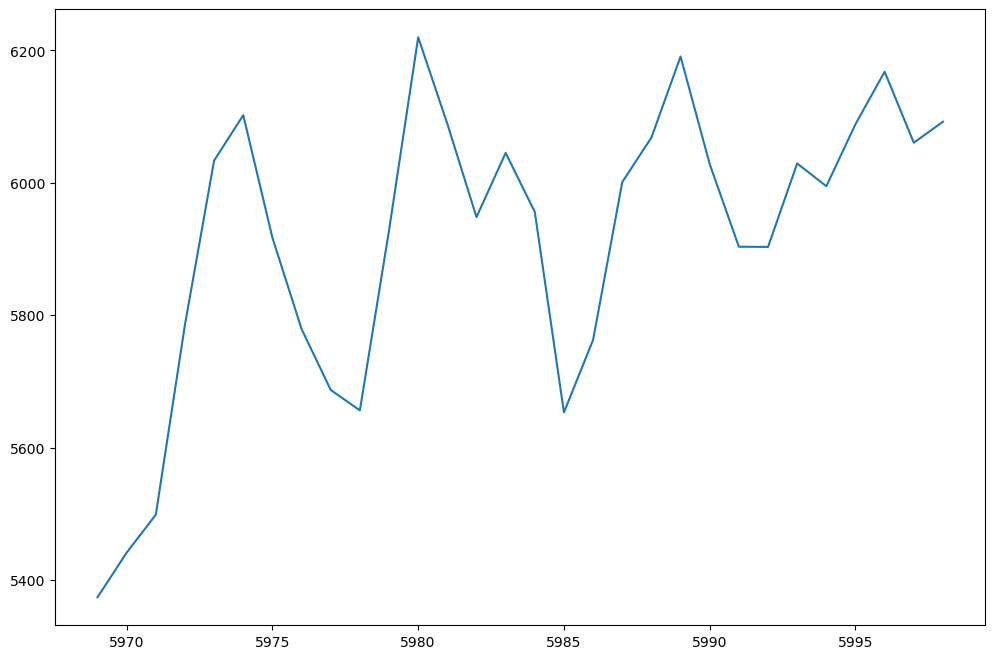

In [32]:
plt.plot(day_pred,lst_output)

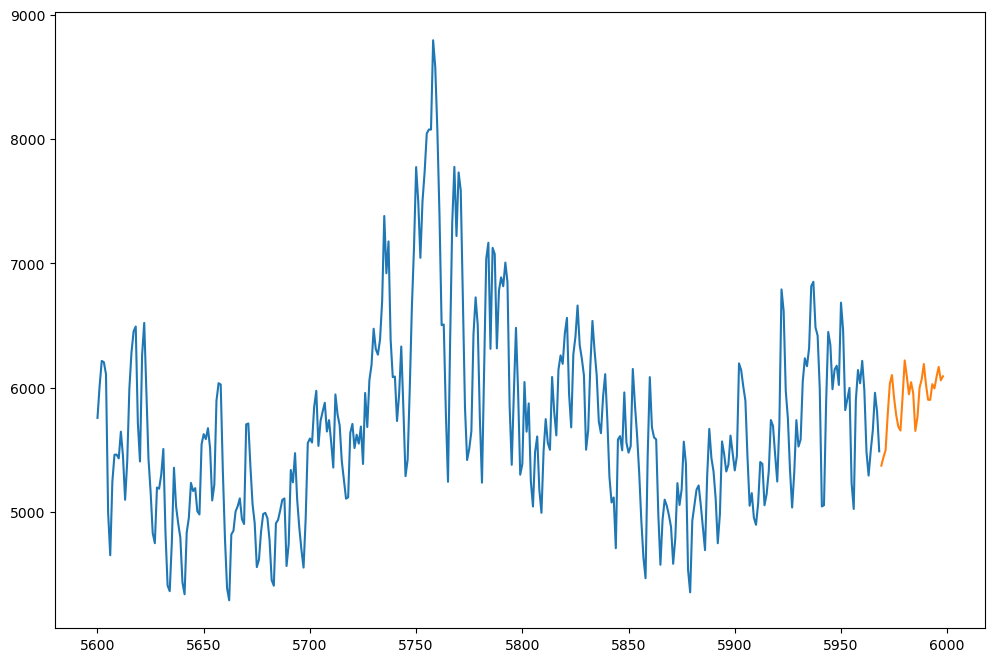

In [33]:
plt.plot(day_new,df['PJMW_MW'][5600:])
plt.plot(day_pred,(lst_output))

In [34]:
future = pd.date_range('2018-08-04','2018-09-02', freq='D')
future_df = pd.DataFrame(index=future)

In [35]:
future_df['Future_Energy'] =lst_output
future_df.reset_index()

,index,Future_Energy
0,2018-08-04,5373.857422
1,2018-08-05,5441.270508
2,2018-08-06,5498.543945
3,2018-08-07,5785.645996
4,2018-08-08,6033.472168
5,2018-08-09,6102.108887
6,2018-08-10,5916.991211
7,2018-08-11,5779.083496
8,2018-08-12,5687.053711
9,2018-08-13,5656.156250


In [36]:
future_df.rename(columns={future_df.index[0]:'Datetime'})

,Future_Energy
2018-08-04,5373.857422
2018-08-05,5441.270508
2018-08-06,5498.543945
2018-08-07,5785.645996
2018-08-08,6033.472168
2018-08-09,6102.108887
2018-08-10,5916.991211
2018-08-11,5779.083496
2018-08-12,5687.053711
2018-08-13,5656.156250


<AxesSubplot:>

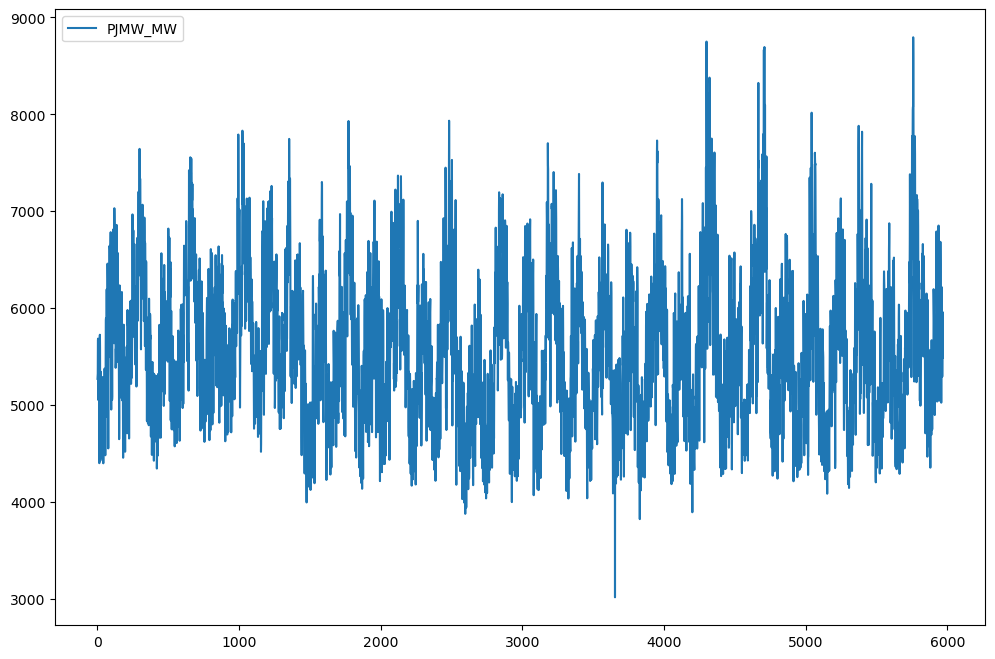

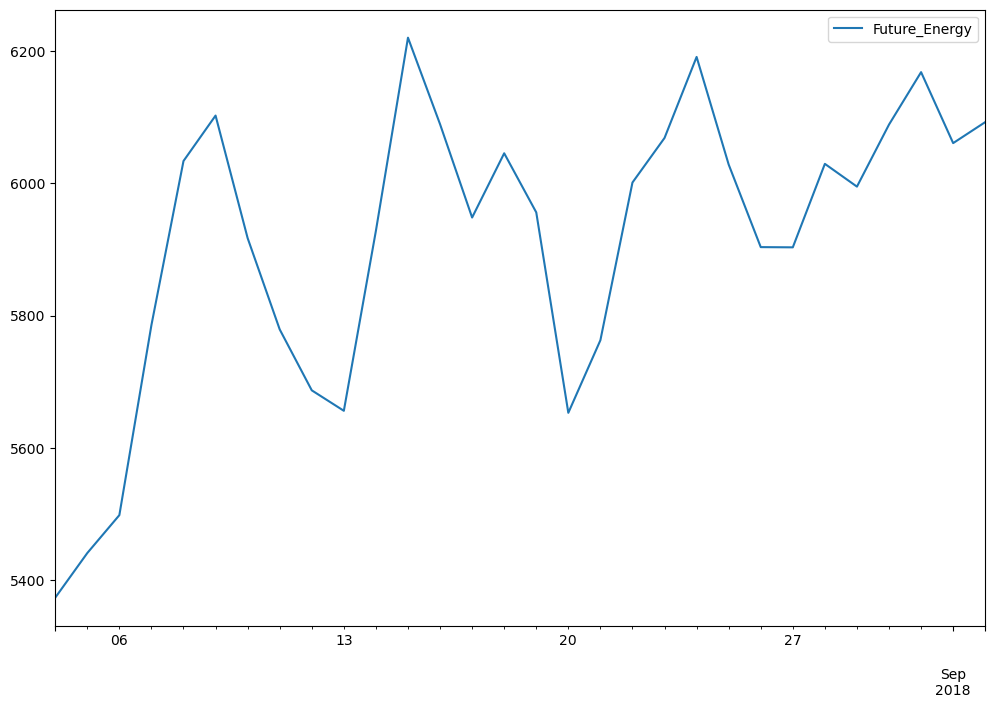

In [37]:
df.plot()
future_df.plot()

In [39]:
future_df.to_csv(r'C:\Users\HP\1. A  project\future.csv')